In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Global YouTube Statistics.csv", encoding='latin-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [4]:
df = df.copy()

df.shape

(995, 28)

In [5]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['float','int64']).columns

df[cat_col] = df[cat_col].fillna('Unknown')
df[num_col] = df[num_col].fillna(0)

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [6]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [7]:
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

df['Youtuber'] = df['Youtuber'].str.replace(pattern, '')
df['Title'] = df['Title'].str.replace(pattern, '')

df['Youtuber'] = df['Youtuber'].str.strip()
df['Title'] = df['Title'].str.strip()

C:\Users\atami\AppData\Local\Temp\ipykernel_22868\3073212546.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Youtuber'] = df['Youtuber'].str.replace(pattern, '')
C:\Users\atami\AppData\Local\Temp\ipykernel_22868\3073212546.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace(pattern, '')


In [8]:
df.sort_values(by = 'subscribers', ascending = False)
df = df.reset_index(drop = True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A,12300000,9.029610e+09,Sports,Natan por A,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


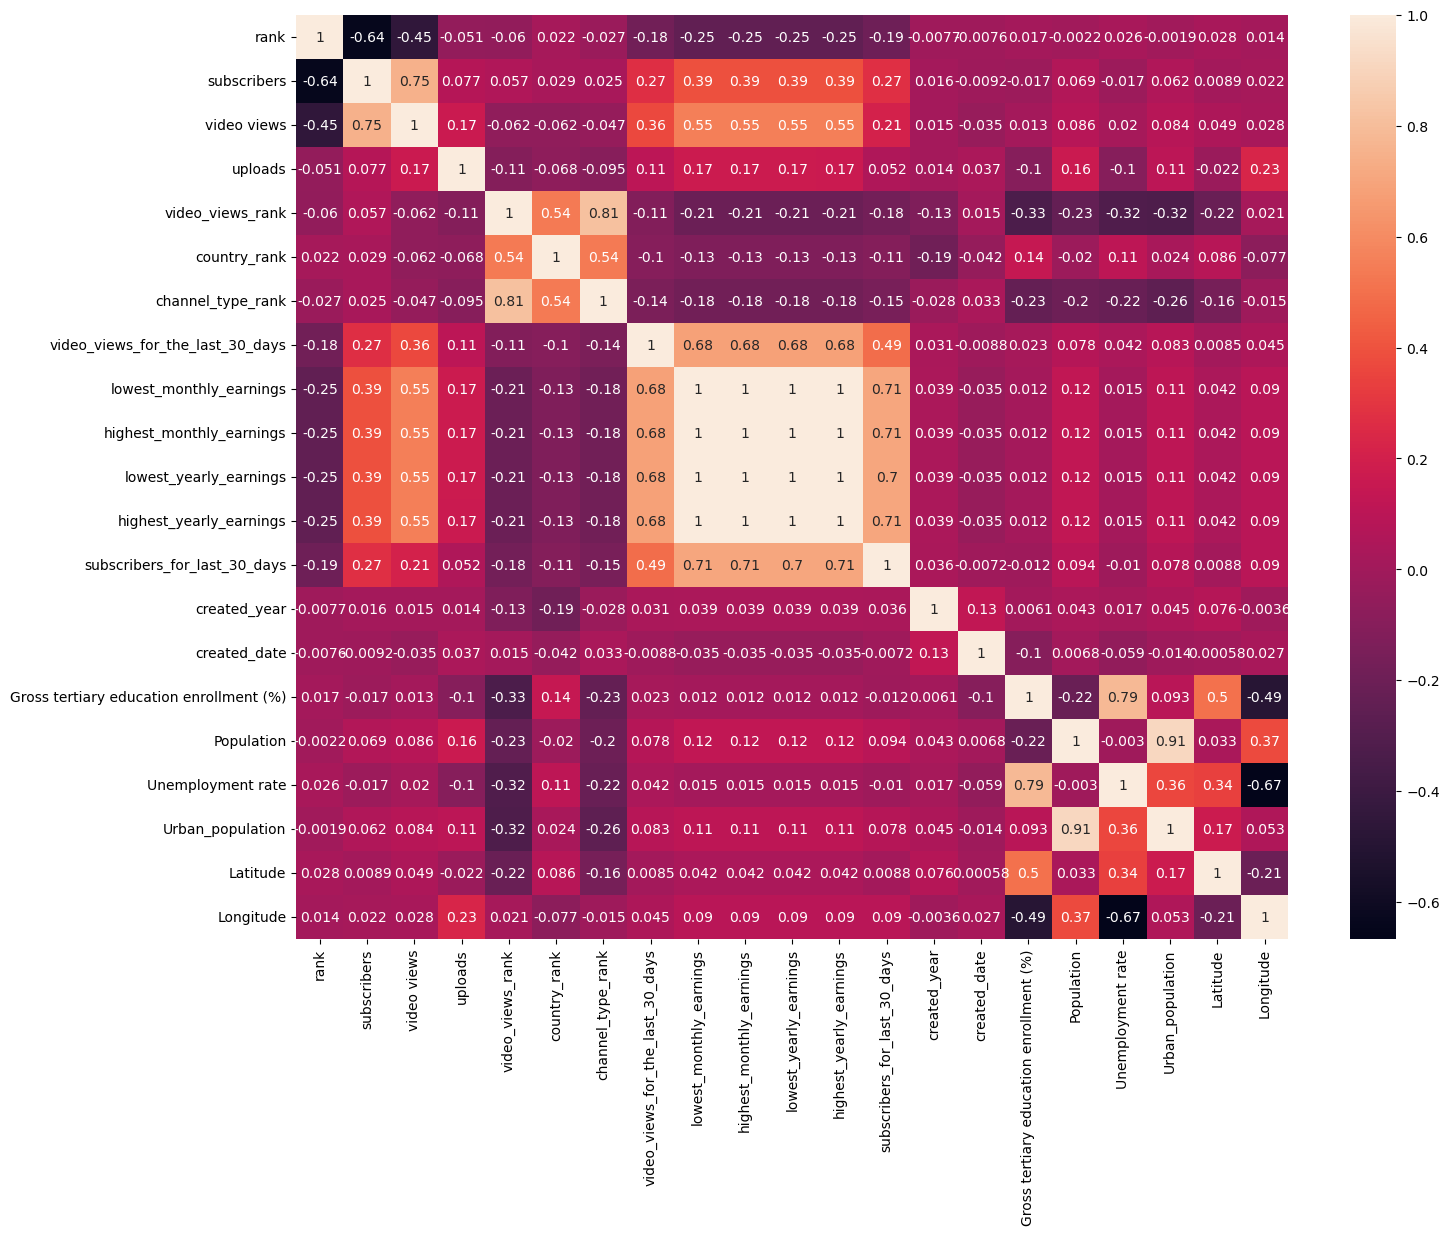

In [9]:
plt.rcParams['figure.figsize'] = (16, 12)
sns.heatmap(df.corr(), annot = True)
plt.show()

In [10]:
top_10 = df.sort_values('subscribers', ascending=False).head(10)
top_10

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,Unknown,Music,0,Unknown,Unknown,Music,...,0.0,2013.0,Sep,24.0,0.0,0.000000e+00,0.00,0.0,0.000000,0.000000
6,7,Kids Diana Show,112000000,9.324704e+10,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,0.0,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,0.0,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [11]:
selected_columns = ['Youtuber', 'subscribers']
top_10_channels = df.loc[0:9, selected_columns]
top_10_channels_desc = top_10_channels.sort_values(by = 'subscribers', ascending = True)
top_10_channels_desc

,Youtuber,subscribers
9,Vlad and Niki,98900000
8,Like Nastya,106000000
7,PewDiePie,111000000
6,Kids Diana Show,112000000
5,Music,119000000
4,SET India,159000000
3,Cocomelon - Nursery Rhymes,162000000
2,MrBeast,166000000
1,YouTube Movies,170000000
0,T-Series,245000000


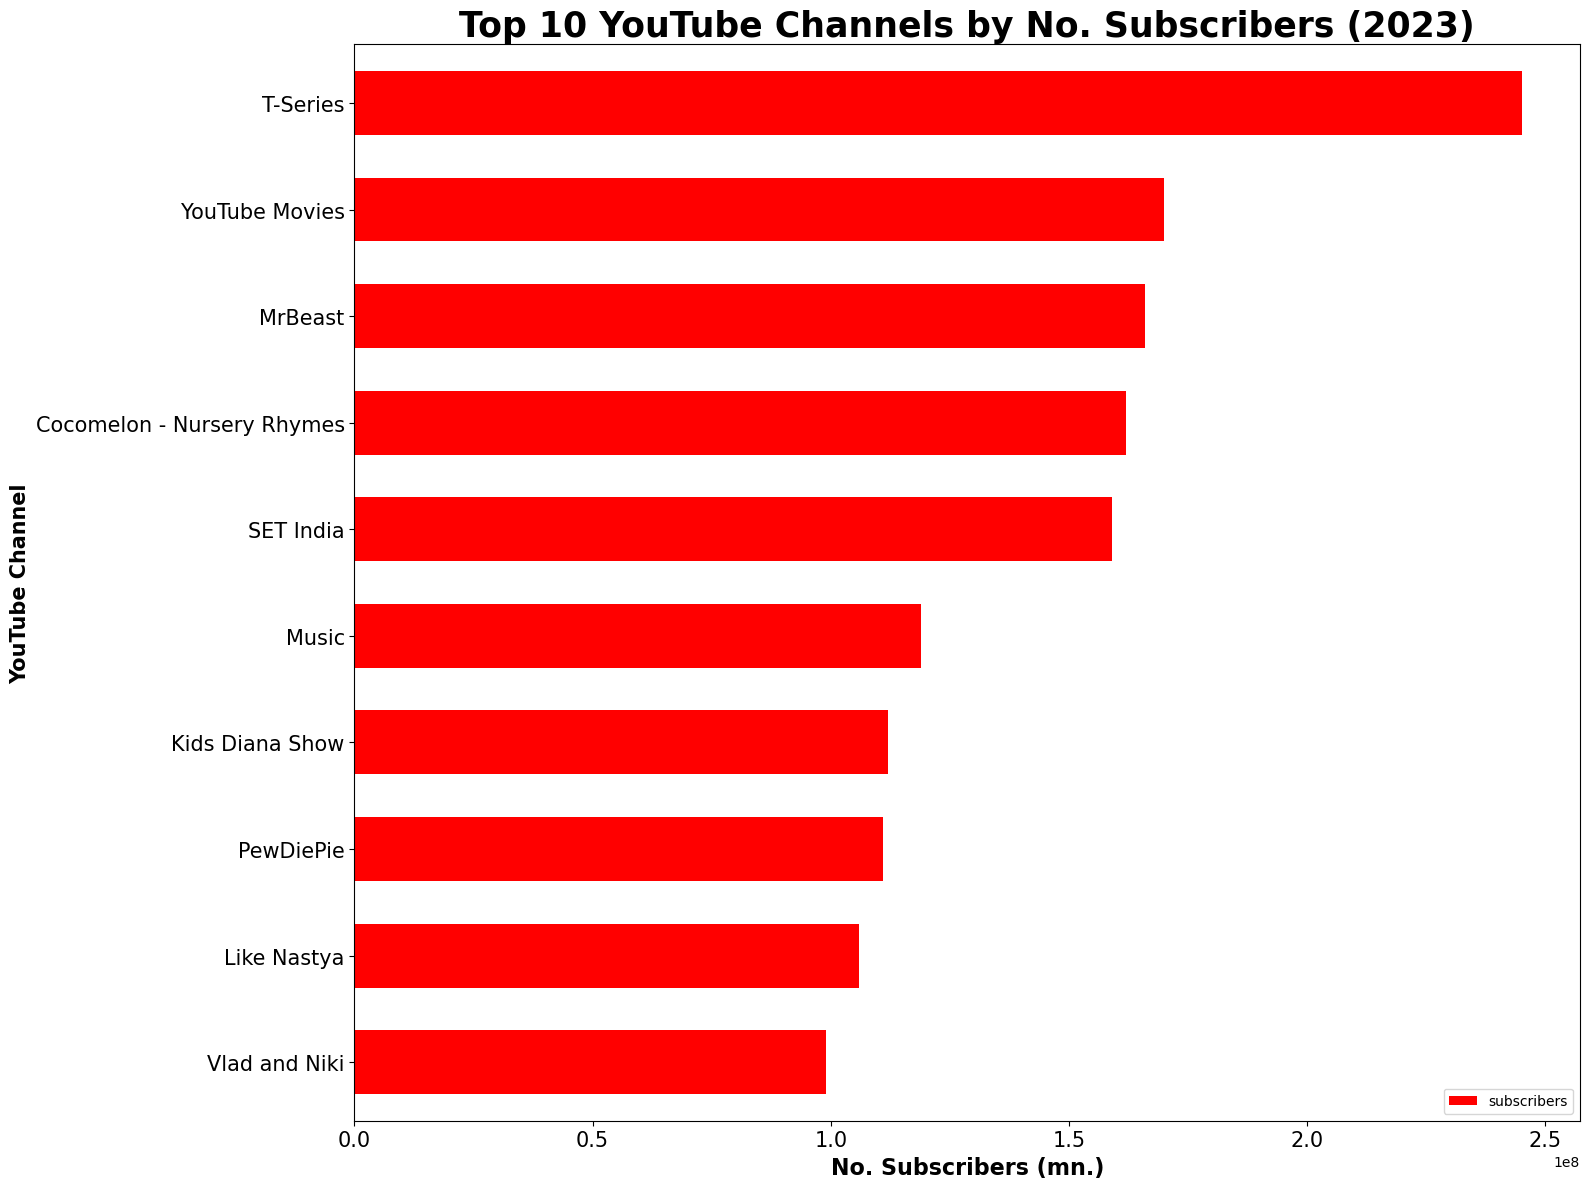

In [12]:
top_10_channels_desc.plot.barh(x = 'Youtuber', y = 'subscribers', stacked = True, color = '#FF0000', width = 0.6)

# Adjust chart formatting 
plt.title('Top 10 YouTube Channels by No. Subscribers (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16,  weight = 'bold')
plt.ylabel('YouTube Channel', fontsize = 15, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [13]:
top_10_channels_desc

,Youtuber,subscribers
9,Vlad and Niki,98900000
8,Like Nastya,106000000
7,PewDiePie,111000000
6,Kids Diana Show,112000000
5,Music,119000000
4,SET India,159000000
3,Cocomelon - Nursery Rhymes,162000000
2,MrBeast,166000000
1,YouTube Movies,170000000
0,T-Series,245000000


In [14]:
top_10_channels_desc['Subscribers (mn.)'] = (top_10_channels_desc['subscribers'] / 1000000).astype(int)
top_10_channels_desc = top_10_channels_desc.drop(columns='subscribers')

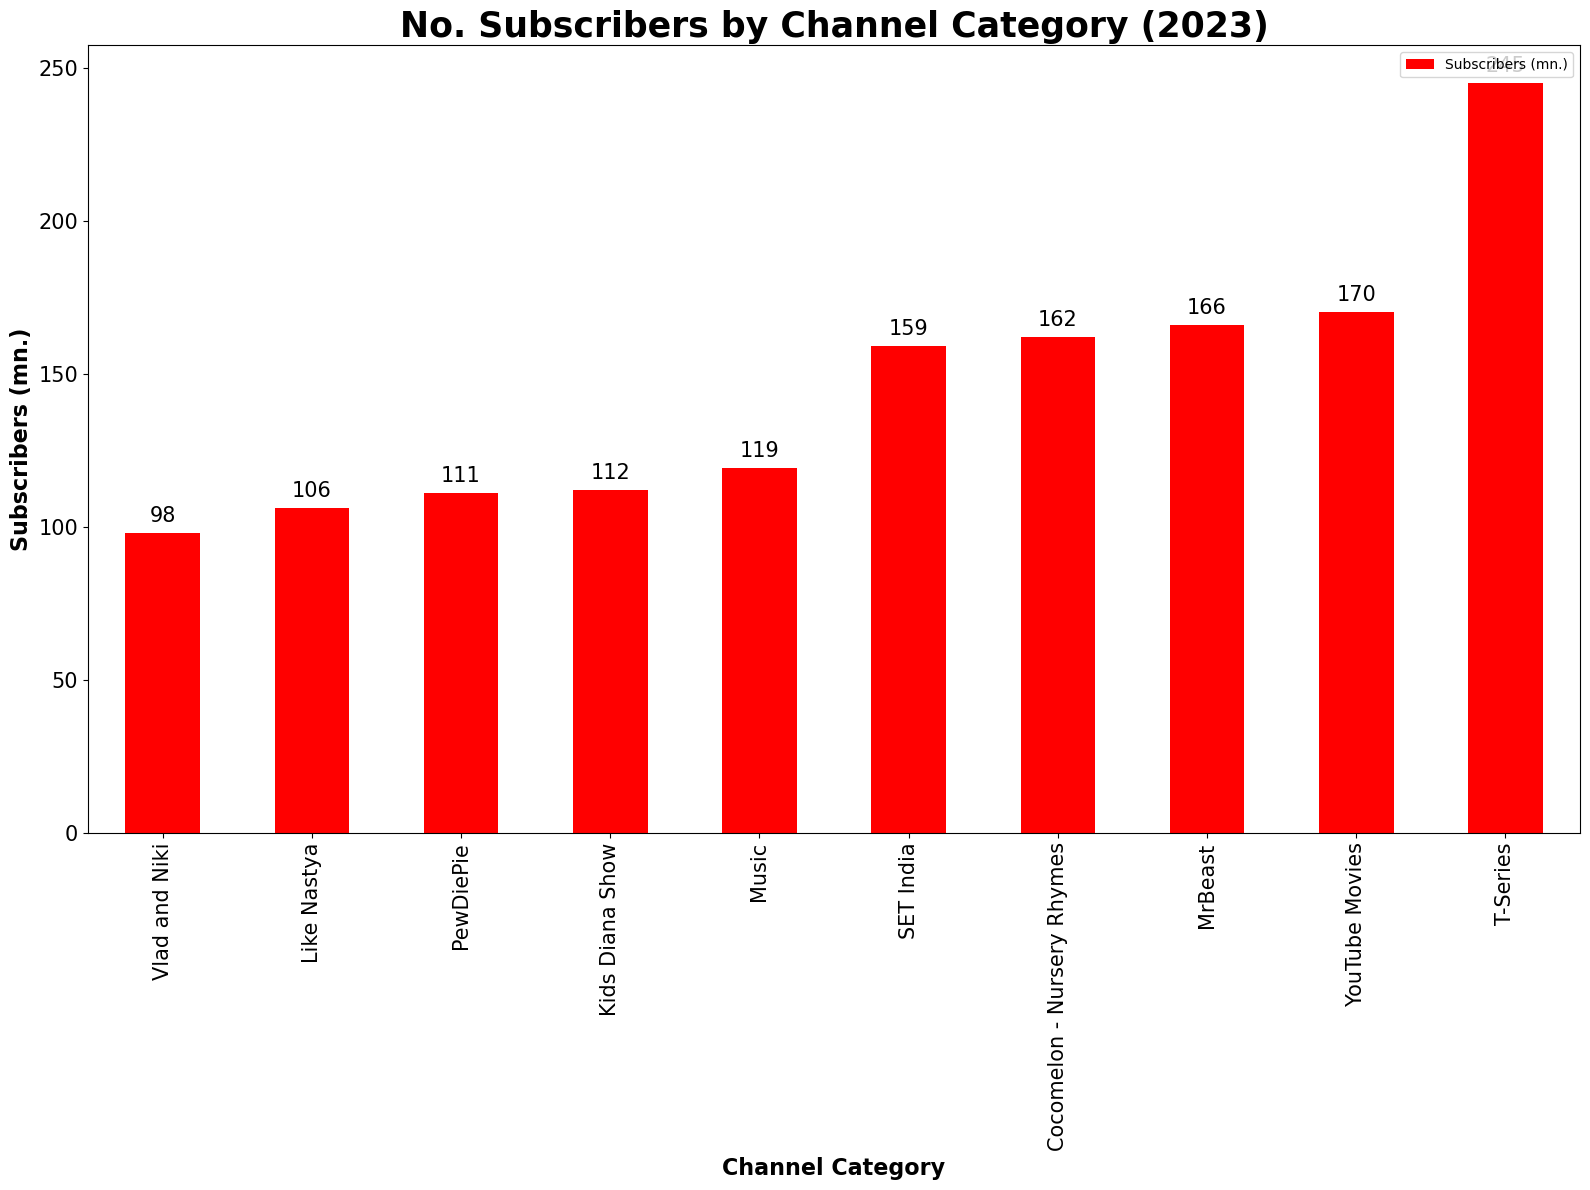

In [15]:
ax = top_10_channels_desc.plot(kind = 'bar', stacked = True, x = 'Youtuber', y = 'Subscribers (mn.)', color = '#FF0000')

for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', color='black', fontsize = 15, padding = 5)

plt.title('No. Subscribers by Channel Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Channel Category', fontsize = 16,  weight = 'bold')
plt.ylabel('Subscribers (mn.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [16]:
top10_cat = df.category.value_counts(ascending=True)
top10_cat = top10_cat.tail(10)
top10_cat

News & Politics      26
Howto & Style        40
Education            45
Unknown              46
Film & Animation     46
Comedy               69
Gaming               94
People & Blogs      132
Music               202
Entertainment       241
Name: category, dtype: int64

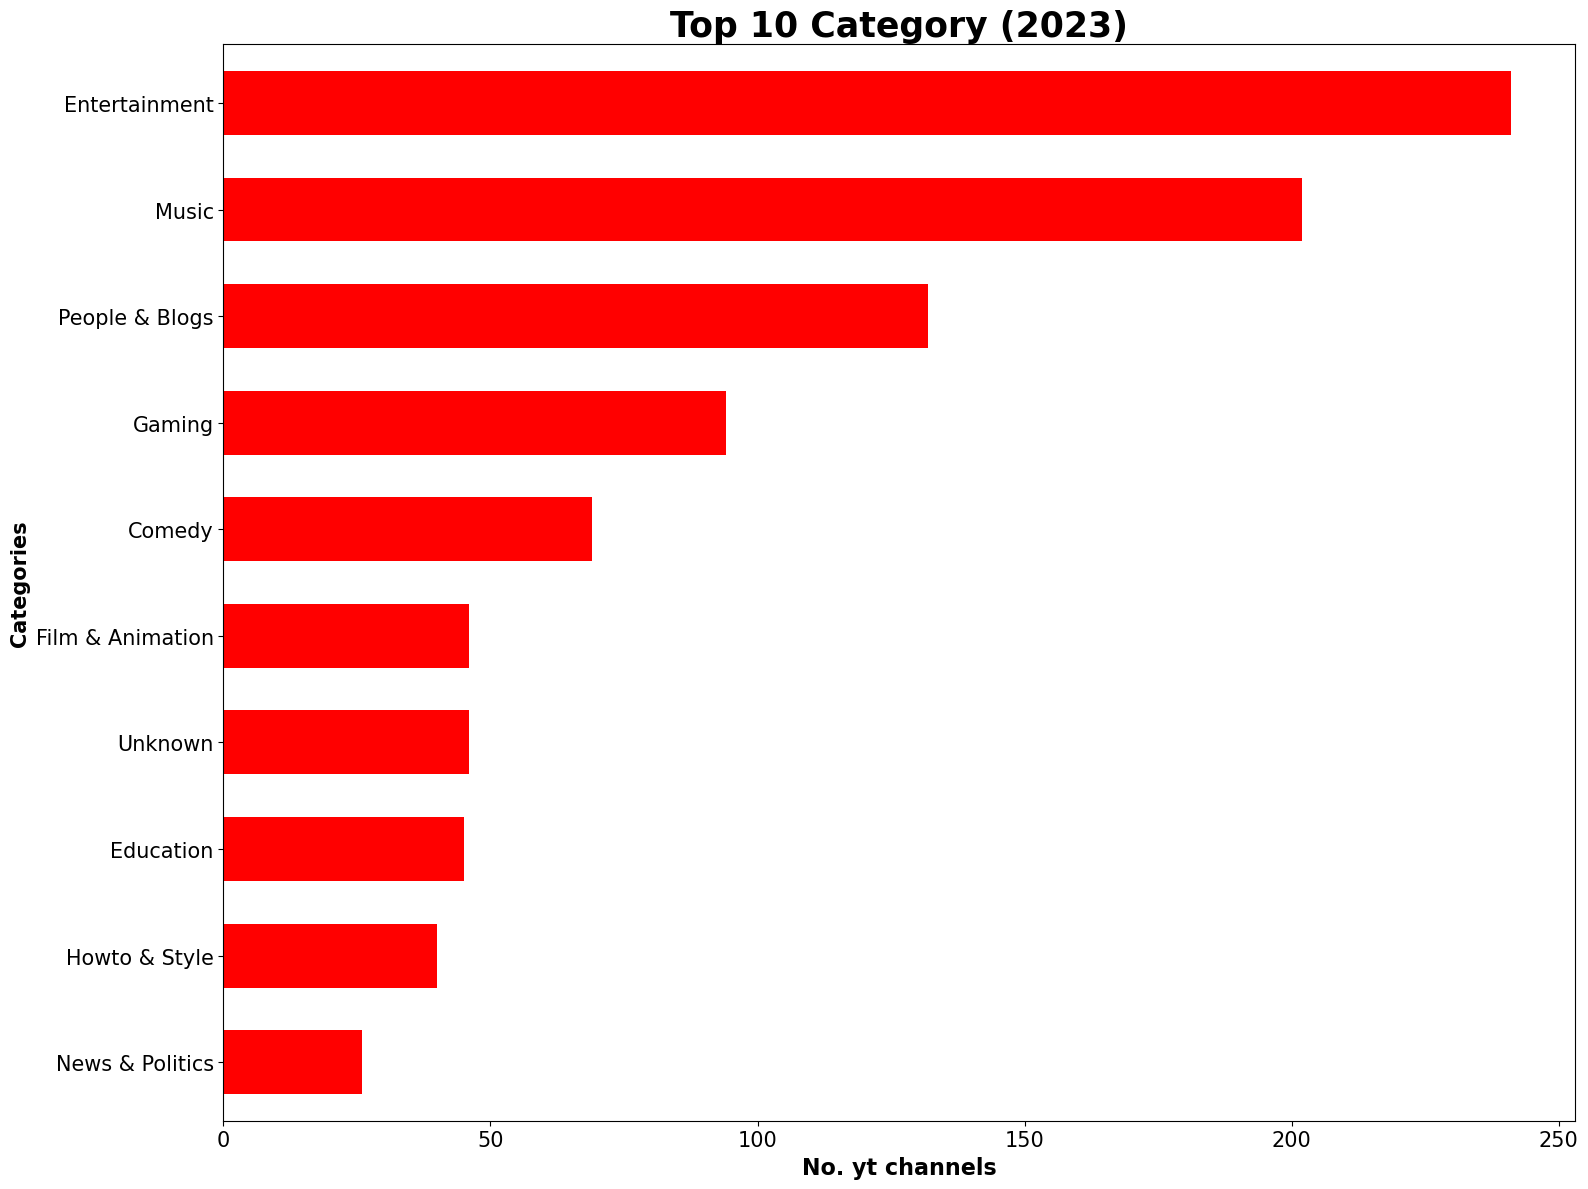

In [17]:
top10_cat.plot.barh(x = 'Youtuber', y = 'category', color = '#FF0000', width = 0.6, )

# Adjust chart formatting 
plt.title('Top 10 Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. yt channels', fontsize = 16,  weight = 'bold')
plt.ylabel('Categories', fontsize = 15, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

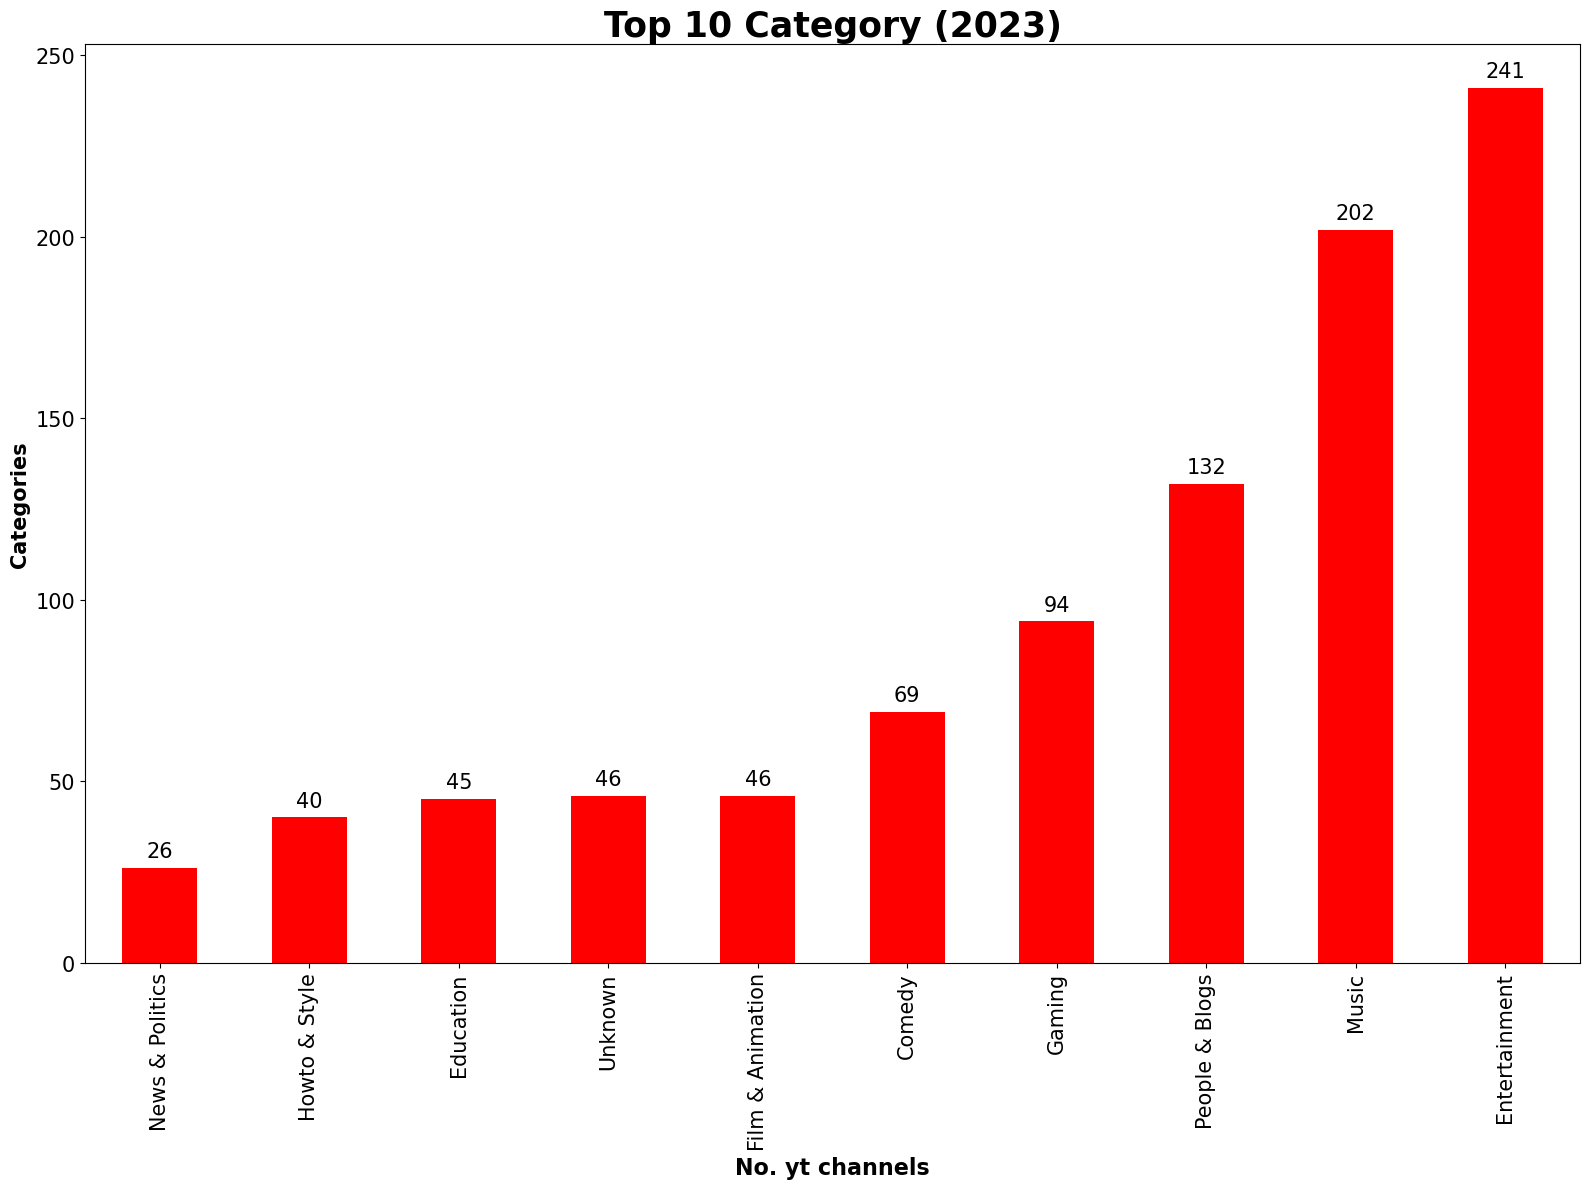

In [18]:
ax = top10_cat.plot(kind = 'bar', stacked = True, x = 'Youtuber', y = 'category', color = '#FF0000')

for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', color='black', fontsize = 15, padding = 5)

plt.title('Top 10 Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. yt channels', fontsize = 16,  weight = 'bold')
plt.ylabel('Categories', fontsize = 15, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [19]:
# Calculate the number of YouTuber channels in each country
country_counts_asc = df['Country'].value_counts(ascending = True)

# Select the top 10 countries based on the number of YouTube channels
top_10_countries = country_counts_asc.tail(10)
top_10_countries.drop('Unknown', inplace=True)

# Data for the top 10 categories and the sum of the remaining categories
data = top_10_countries.tolist()
data += [country_counts_asc[:-10].sum() + 122]


# Labels for the top 10 categories and 'Others' for the remaining categories
labels = top_10_countries.index.tolist() + ['Others']
         
# Set colour palette for the top 10 categories & a seperate colour for 'Others'
colors = sns.color_palette("pastel", 10)

# Gray color for 'Others'
# colors += [(0.8, 0.8, 0.8)]  
# .drop('Unknown')

In [20]:
labels

['South Korea',
 'Thailand',
 'Spain',
 'Indonesia',
 'Mexico',
 'United Kingdom',
 'Brazil',
 'India',
 'United States',
 'Others']

In [21]:
data

[17, 18, 22, 28, 33, 43, 62, 168, 313, 291]

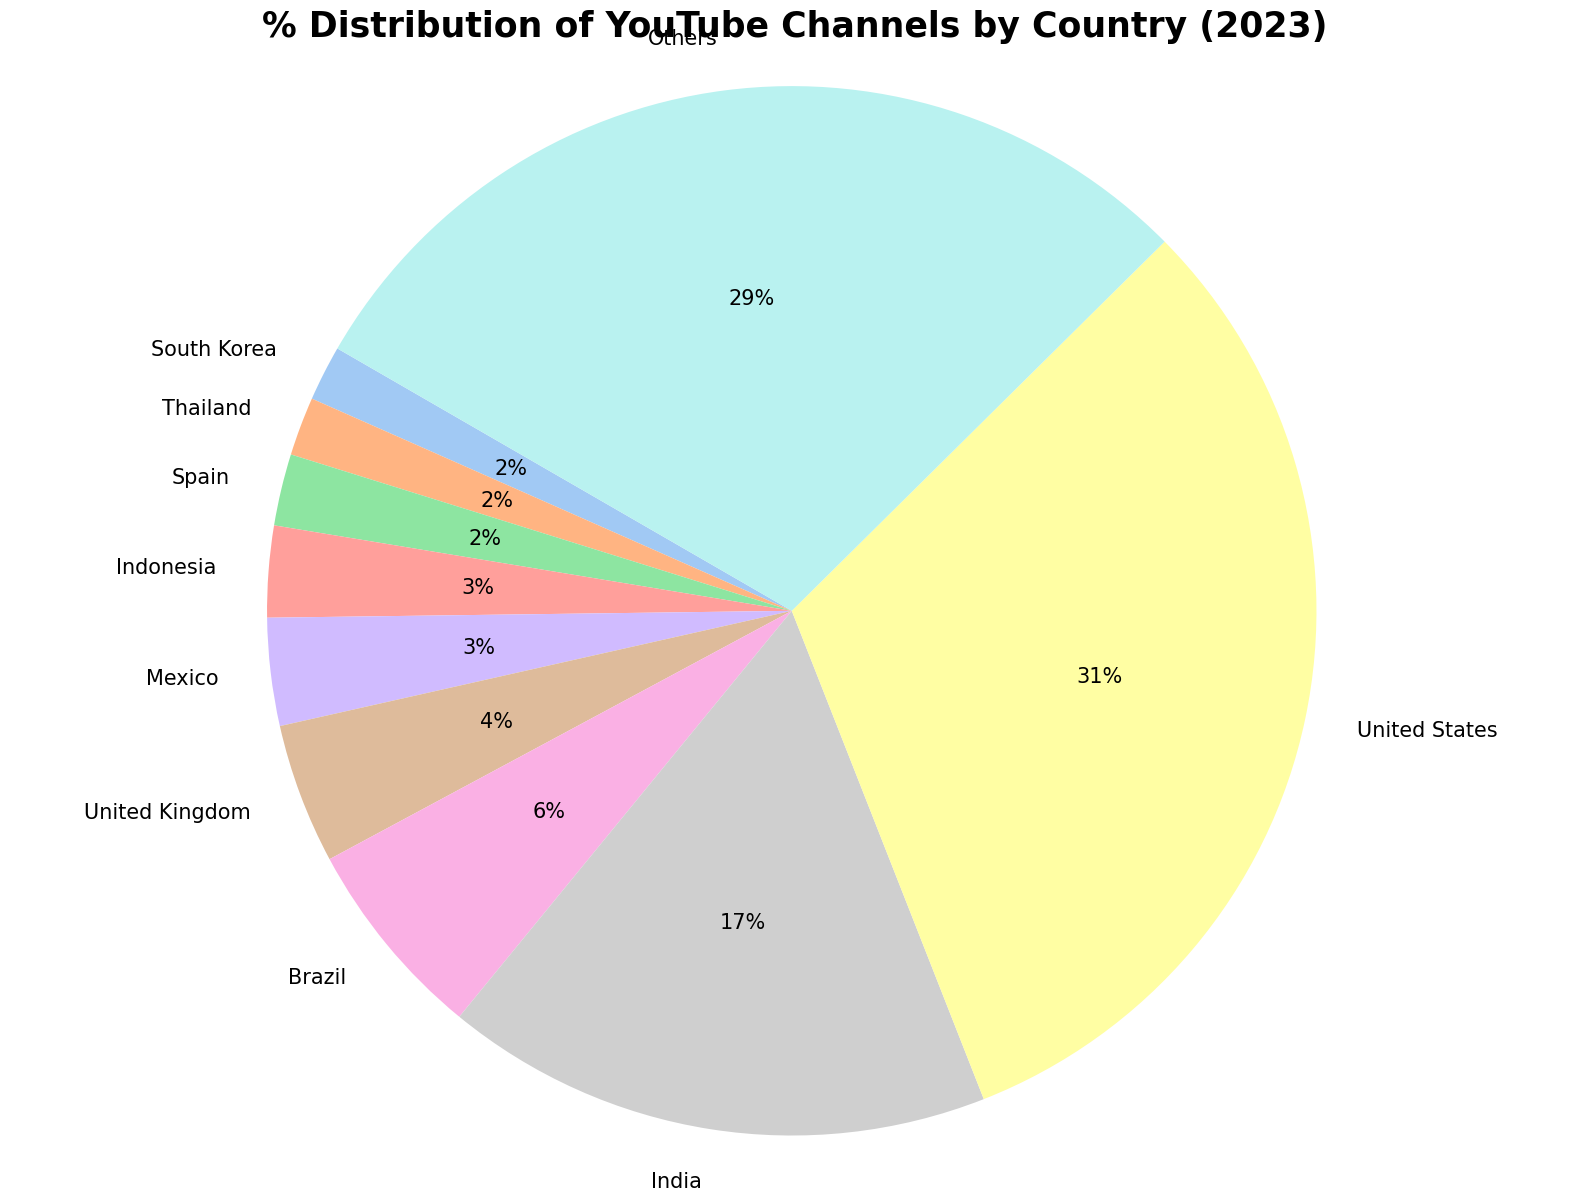

In [22]:
# create a pie chart using Matplotlib with adjusted start angle and larger font size
wedges, texts, autotexts = plt.pie(data, labels = labels, autopct = '%1.0f%%', colors = colors, startangle = 150, textprops = {'fontsize': 15})

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# increase the font size of the pie chart labels and percentage values
for text in texts:
    text.set_fontsize(15)
for autotext in autotexts:
    autotext.set_fontsize(15)
    
# Adjust chart formatting 
plt.title('% Distribution of YouTube Channels by Country (2023)', fontsize = 25, weight = 'bold')
plt.tight_layout()